In [81]:
import pandas as pd
import numpy as np
import plotly as pt
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("C:/Users/FID bebshai forhad/Downloads/data.csv")

In [83]:
df.head(50)

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [85]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


In [86]:
df.isna().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

In [87]:
df.nunique()

Duration     4
Date        30
Pulse       15
Maxpulse    24
Calories    26
dtype: int64

In this dataset there are total 32 observations fro 5 variables named Duration, Date, Pulse, Maxpulse and Calories.
In Duration column we have 4 unique duration observation and 0 null value
In Date column we have 30 unique obsevation and 1 null value
In Pulse we have 15 unique observation and 0 null value
In Maxpulse we have 24 unique observation and 0 null value
In Calories we have 26 unique observation and 2 null values


Now we will separate these  rows withh null values and also chech all these duplicate values

In [88]:
df_null = df[df.isnull().any(axis=1)]
print(df_null)

    Duration          Date  Pulse  Maxpulse  Calories
18        45  '2020/12/18'     90       112       NaN
22        45           NaN    100       119     282.0
28        60  '2020/12/28'    103       132       NaN


Since null rows is not entirely null so we will not simply drop them but replace them with some values.
Lets check date column first

In [89]:
print(df['Date'])

0     '2020/12/01'
1     '2020/12/02'
2     '2020/12/03'
3     '2020/12/04'
4     '2020/12/05'
5     '2020/12/06'
6     '2020/12/07'
7     '2020/12/08'
8     '2020/12/09'
9     '2020/12/10'
10    '2020/12/11'
11    '2020/12/12'
12    '2020/12/12'
13    '2020/12/13'
14    '2020/12/14'
15    '2020/12/15'
16    '2020/12/16'
17    '2020/12/17'
18    '2020/12/18'
19    '2020/12/19'
20    '2020/12/20'
21    '2020/12/21'
22             NaN
23    '2020/12/23'
24    '2020/12/24'
25    '2020/12/25'
26        20201226
27    '2020/12/27'
28    '2020/12/28'
29    '2020/12/29'
30    '2020/12/30'
31    '2020/12/31'
Name: Date, dtype: object


we will clean date column.
Since only missing value is date 2020/12/22 so we will replace null value in Date column in df.
We can also see has the values has '' which we will remove
on 27th row the data  20201226 which is not righly formatted so we will do that to.

In [90]:
df['Date']= df['Date'].fillna('2020/12/22')
print(df)

    Duration          Date  Pulse  Maxpulse  Calories
0         60  '2020/12/01'    110       130     409.1
1         60  '2020/12/02'    117       145     479.0
2         60  '2020/12/03'    103       135     340.0
3         45  '2020/12/04'    109       175     282.4
4         45  '2020/12/05'    117       148     406.0
5         60  '2020/12/06'    102       127     300.0
6         60  '2020/12/07'    110       136     374.0
7        450  '2020/12/08'    104       134     253.3
8         30  '2020/12/09'    109       133     195.1
9         60  '2020/12/10'     98       124     269.0
10        60  '2020/12/11'    103       147     329.3
11        60  '2020/12/12'    100       120     250.7
12        60  '2020/12/12'    100       120     250.7
13        60  '2020/12/13'    106       128     345.3
14        60  '2020/12/14'    104       132     379.3
15        60  '2020/12/15'     98       123     275.0
16        60  '2020/12/16'     98       120     215.2
17        60  '2020/12/17'  

In [91]:
df['Date'] = df['Date'].str.replace("'", "", regex=False)

print(df)

    Duration        Date  Pulse  Maxpulse  Calories
0         60  2020/12/01    110       130     409.1
1         60  2020/12/02    117       145     479.0
2         60  2020/12/03    103       135     340.0
3         45  2020/12/04    109       175     282.4
4         45  2020/12/05    117       148     406.0
5         60  2020/12/06    102       127     300.0
6         60  2020/12/07    110       136     374.0
7        450  2020/12/08    104       134     253.3
8         30  2020/12/09    109       133     195.1
9         60  2020/12/10     98       124     269.0
10        60  2020/12/11    103       147     329.3
11        60  2020/12/12    100       120     250.7
12        60  2020/12/12    100       120     250.7
13        60  2020/12/13    106       128     345.3
14        60  2020/12/14    104       132     379.3
15        60  2020/12/15     98       123     275.0
16        60  2020/12/16     98       120     215.2
17        60  2020/12/17    100       120     300.0
18        45

In [92]:
df.loc[26, 'Date'] = '2020/12/26'
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
print(df)

    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130     409.1
1         60 2020-12-02    117       145     479.0
2         60 2020-12-03    103       135     340.0
3         45 2020-12-04    109       175     282.4
4         45 2020-12-05    117       148     406.0
5         60 2020-12-06    102       127     300.0
6         60 2020-12-07    110       136     374.0
7        450 2020-12-08    104       134     253.3
8         30 2020-12-09    109       133     195.1
9         60 2020-12-10     98       124     269.0
10        60 2020-12-11    103       147     329.3
11        60 2020-12-12    100       120     250.7
12        60 2020-12-12    100       120     250.7
13        60 2020-12-13    106       128     345.3
14        60 2020-12-14    104       132     379.3
15        60 2020-12-15     98       123     275.0
16        60 2020-12-16     98       120     215.2
17        60 2020-12-17    100       120     300.0
18        45 2020-12-18     90 

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Duration  32 non-null     int64         
 1   Date      32 non-null     datetime64[ns]
 2   Pulse     32 non-null     int64         
 3   Maxpulse  32 non-null     int64         
 4   Calories  30 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.4 KB


Now we wii fix Calories column for null values

In [94]:
print(df['Calories'])

0     409.1
1     479.0
2     340.0
3     282.4
4     406.0
5     300.0
6     374.0
7     253.3
8     195.1
9     269.0
10    329.3
11    250.7
12    250.7
13    345.3
14    379.3
15    275.0
16    215.2
17    300.0
18      NaN
19    323.0
20    243.0
21    364.2
22    282.0
23    300.0
24    246.0
25    334.5
26    250.0
27    241.0
28      NaN
29    280.0
30    380.3
31    243.0
Name: Calories, dtype: float64


we will replace the null values in Calories column with mean value.

In [95]:
mean_calories = df['Calories'].mean()
df['Calories'] = df['Calories'].fillna(mean_calories)

In [96]:
print(df)

    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130    409.10
1         60 2020-12-02    117       145    479.00
2         60 2020-12-03    103       135    340.00
3         45 2020-12-04    109       175    282.40
4         45 2020-12-05    117       148    406.00
5         60 2020-12-06    102       127    300.00
6         60 2020-12-07    110       136    374.00
7        450 2020-12-08    104       134    253.30
8         30 2020-12-09    109       133    195.10
9         60 2020-12-10     98       124    269.00
10        60 2020-12-11    103       147    329.30
11        60 2020-12-12    100       120    250.70
12        60 2020-12-12    100       120    250.70
13        60 2020-12-13    106       128    345.30
14        60 2020-12-14    104       132    379.30
15        60 2020-12-15     98       123    275.00
16        60 2020-12-16     98       120    215.20
17        60 2020-12-17    100       120    300.00
18        45 2020-12-18     90 

We will just rename column Maxpulse as Max_pulse and Pulse as Min_Pulse

In [97]:
df.rename(columns={'Maxpulse': 'Max_pulse'}, inplace=True)
df.rename(columns={'Pulse': 'Min_pulse'}, inplace=True)

In [98]:
print(df)

    Duration       Date  Min_pulse  Max_pulse  Calories
0         60 2020-12-01        110        130    409.10
1         60 2020-12-02        117        145    479.00
2         60 2020-12-03        103        135    340.00
3         45 2020-12-04        109        175    282.40
4         45 2020-12-05        117        148    406.00
5         60 2020-12-06        102        127    300.00
6         60 2020-12-07        110        136    374.00
7        450 2020-12-08        104        134    253.30
8         30 2020-12-09        109        133    195.10
9         60 2020-12-10         98        124    269.00
10        60 2020-12-11        103        147    329.30
11        60 2020-12-12        100        120    250.70
12        60 2020-12-12        100        120    250.70
13        60 2020-12-13        106        128    345.30
14        60 2020-12-14        104        132    379.30
15        60 2020-12-15         98        123    275.00
16        60 2020-12-16         98        120   

Data looks clean now we will look for outlier

In [99]:
outliers_dict = {}

for column in ['Duration', 'Min_pulse', 'Max_pulse', 'Calories']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_dict[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    }
    
# Print outliers for each column
for column, data in outliers_dict.items():
    print(f"Outliers for {column}:")
    print(data['outliers'][column])
    print("\n")


Outliers for Duration:
3      45
4      45
7     450
8      30
18     45
20     45
22     45
24     45
Name: Duration, dtype: int64


Outliers for Min_pulse:
1     117
4     117
18     90
23    130
Name: Min_pulse, dtype: int64


Outliers for Max_pulse:
3     175
23    101
Name: Max_pulse, dtype: int64


Outliers for Calories:
1    479.0
Name: Calories, dtype: float64




Here we can see Duration has 8 outliers and 3 unique outlier value 30, 45 and 450
Pulse has 4 outliers and 3 unique outlier values 117, 90, 130
Max_Pulse has 2 unique outliers and they are 175, 101
Calories has only one outlier 479

Lets deal with outliers by replacing them with median value


In [100]:
# Calculate the median value of Duration
duration_median = df['Duration'].median()

# Replace outliers with the median for the 'Duration' column
df['Duration'] = df['Duration'].apply(lambda x: duration_median if x == 450 or x == 30 else x)

In [101]:
# Calculate the median value of Min_pulse
min_pulse_median = df['Min_pulse'].median()
df['Min_pulse'] = df['Min_pulse'].apply(lambda x: min_pulse_median if x == 130 or x == 90 else x)

In [102]:
# Calculate the median value of Max_pulse
Max_pulse_median = df['Max_pulse'].median()
df['Max_pulse'] = df['Max_pulse'].apply(lambda x: Max_pulse_median if x == 175 or x == 101 else x)

In [103]:
calories_median = df['Calories'].median()
df['Calories'] = df['Calories'].apply(lambda x: calories_median if x == 479.0 else x)

In [104]:
print(df)

    Duration       Date  Min_pulse  Max_pulse  Calories
0       60.0 2020-12-01      110.0      130.0    409.10
1       60.0 2020-12-02      117.0      145.0    300.00
2       60.0 2020-12-03      103.0      135.0    340.00
3       45.0 2020-12-04      109.0      127.5    282.40
4       45.0 2020-12-05      117.0      148.0    406.00
5       60.0 2020-12-06      102.0      127.0    300.00
6       60.0 2020-12-07      110.0      136.0    374.00
7       60.0 2020-12-08      104.0      134.0    253.30
8       60.0 2020-12-09      109.0      133.0    195.10
9       60.0 2020-12-10       98.0      124.0    269.00
10      60.0 2020-12-11      103.0      147.0    329.30
11      60.0 2020-12-12      100.0      120.0    250.70
12      60.0 2020-12-12      100.0      120.0    250.70
13      60.0 2020-12-13      106.0      128.0    345.30
14      60.0 2020-12-14      104.0      132.0    379.30
15      60.0 2020-12-15       98.0      123.0    275.00
16      60.0 2020-12-16       98.0      120.0   

Now data is completely clean and sorted and ready for statistical analysis and visualization

In [105]:
df.describe()

,Duration,Min_pulse,Max_pulse,Calories
count,32.000000,32.000000,32.000000,32.000000
mean,57.187500,103.031250,127.843750,299.086250
std,5.948367,5.714918,8.628009,55.349805
min,45.000000,92.000000,112.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,300.000000
75%,60.000000,105.250000,132.000000,335.875000
max,60.000000,117.000000,148.000000,409.100000


So average duration is 57.1875, where min is 45 and max is 60
average pulse is 100.375 where min is 60 and max is 117
average max_pulse is 123.625, where min is 132.625 and max is 148
average calories is 299.08625 where min is 195.1 and max is 409.1

In [106]:
print(duration_median)

60.0


In [107]:
print(min_pulse_median)

102.5


In [108]:
print(Max_pulse_median)

127.5


In [109]:
print(calories_median)

300.0


In [110]:
duration_mode = df['Duration'].mode()
print(duration_mode)
min_pulse_mode = df['Min_pulse'].mode()
print(min_pulse_mode)
max_pulse_mode= df['Max_pulse'].mode()
print(max_pulse_mode)
calories_mode= df['Calories'].mode()
print(calories_mode)

0    60.0
Name: Duration, dtype: float64
0    100.0
Name: Min_pulse, dtype: float64
0    120.0
Name: Max_pulse, dtype: float64
0    300.0
Name: Calories, dtype: float64


In [111]:
# Group by Duration (45 and 60)
grouped = df.groupby('Duration')

# Display the groups separately for Duration = 45 and Duration = 60
group_45 = grouped.get_group(45)
group_60 = grouped.get_group(60)



In [112]:
# Print the grouped data
print("Group with Duration 45:")
print(group_45)

print("\nGroup with Duration 60:")
print(group_60)

Group with Duration 45:
    Duration       Date  Min_pulse  Max_pulse  Calories
3       45.0 2020-12-04      109.0      127.5    282.40
4       45.0 2020-12-05      117.0      148.0    406.00
18      45.0 2020-12-18      102.5      112.0    304.68
20      45.0 2020-12-20       97.0      125.0    243.00
22      45.0 2020-12-22      100.0      119.0    282.00
24      45.0 2020-12-24      105.0      132.0    246.00

Group with Duration 60:
    Duration       Date  Min_pulse  Max_pulse  Calories
0       60.0 2020-12-01      110.0      130.0    409.10
1       60.0 2020-12-02      117.0      145.0    300.00
2       60.0 2020-12-03      103.0      135.0    340.00
5       60.0 2020-12-06      102.0      127.0    300.00
6       60.0 2020-12-07      110.0      136.0    374.00
7       60.0 2020-12-08      104.0      134.0    253.30
8       60.0 2020-12-09      109.0      133.0    195.10
9       60.0 2020-12-10       98.0      124.0    269.00
10      60.0 2020-12-11      103.0      147.0    329.30

In [113]:
corr = df.corr()
print(corr)

           Duration  Min_pulse  Max_pulse  Calories
Duration   1.000000  -0.175254   0.033587  0.044733
Min_pulse -0.175254   1.000000   0.736253  0.528026
Max_pulse  0.033587   0.736253   1.000000  0.459364
Calories   0.044733   0.528026   0.459364  1.000000


variable calories has significant correlation with both min_pulse and max_pulse and min_pulse and max_pulse has strongest correlation.
Here we see the higher is the minimum pulse rate the higher is the maximum pulse rate.
The higher is calories intake the higher is minimum pulse rate and maximum pulse rate.

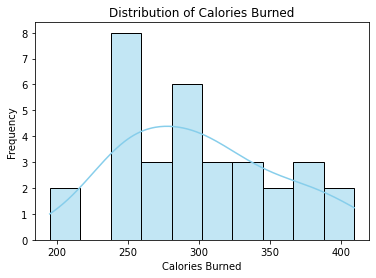

In [125]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.histplot(df['Calories'], bins=10, kde=True, color='skyblue')

plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.title('Distribution of Calories Burned')
plt.show()

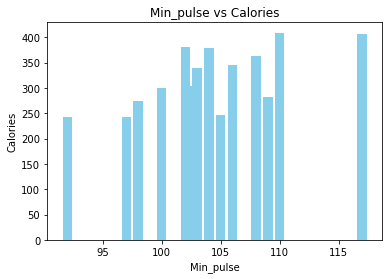

In [115]:
plt.bar(df['Min_pulse'],df['Calories'], color='skyblue')

# Labels and title
plt.xlabel("Min_pulse")
plt.ylabel("Calories")
plt.title("Min_pulse vs Calories")

# Show plot
plt.show()

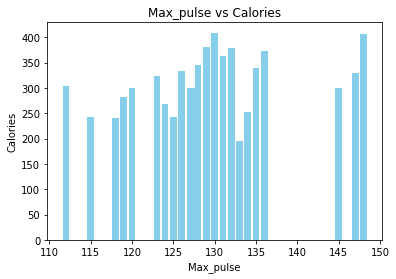

In [116]:
plt.bar(df['Max_pulse'],df['Calories'], color='skyblue')

# Labels and title
plt.xlabel("Max_pulse")
plt.ylabel("Calories")
plt.title("Max_pulse vs Calories")

# Show plot
plt.show()

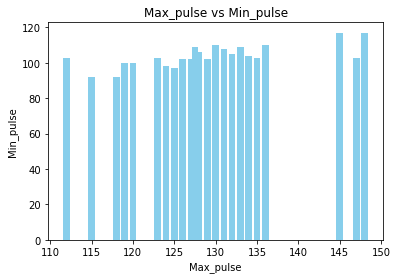

In [118]:
plt.bar(df['Max_pulse'],df['Min_pulse'], color='skyblue')

# Labels and title
plt.xlabel("Max_pulse")
plt.ylabel("Min_pulse")
plt.title("Max_pulse vs Min_pulse")

# Show plot
plt.show()

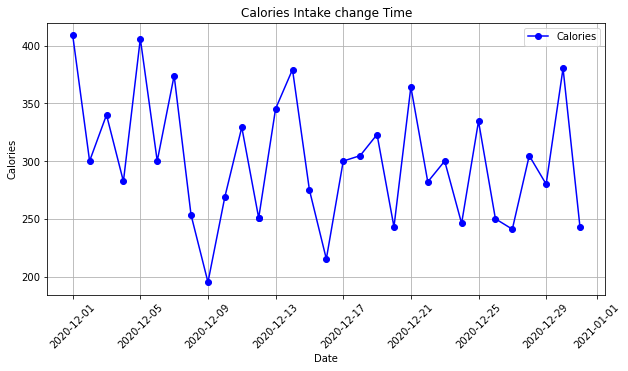

In [120]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Calories'], marker='o', linestyle='-', color='b', label='Calories')

plt.xlabel('Date')
plt.ylabel('Calories')
plt.title('Calories Intake change Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

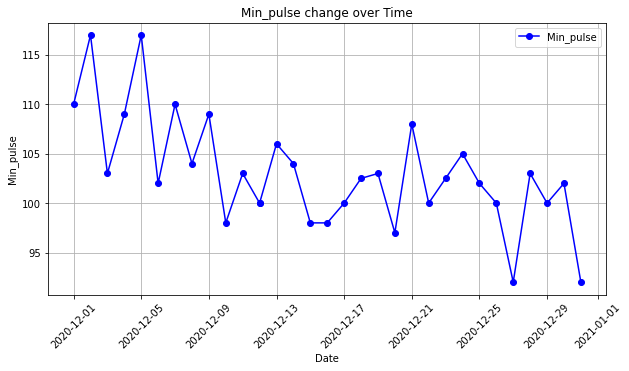

In [126]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Min_pulse'], marker='o', linestyle='-', color='b', label='Min_pulse')

plt.xlabel('Date')
plt.ylabel('Min_pulse')
plt.title('Min_pulse change over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

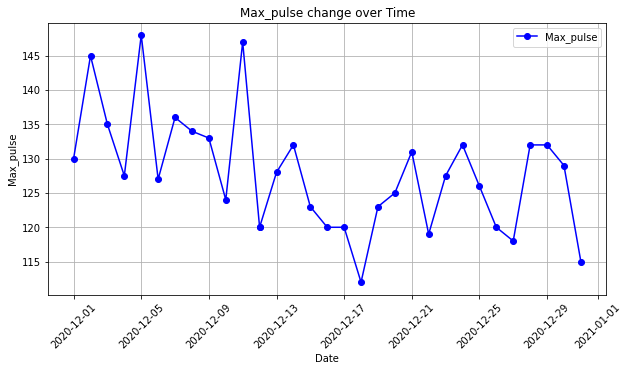

In [127]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Max_pulse'], marker='o', linestyle='-', color='b', label='Max_pulse')

plt.xlabel('Date')
plt.ylabel('Max_pulse')
plt.title('Max_pulse change over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Assuming these data belong to one person we can see over time that person reduced calories intake which decreased 